Description:

This is the experiment to simulate the publicated research "Information and the skewness of music sales." Journal of political Economy 117.2 (2009): 324-369, by Ken Hendricks and Alan Sorensen.

1. First explore the data. Look at it visually. When does each artist release their second album?

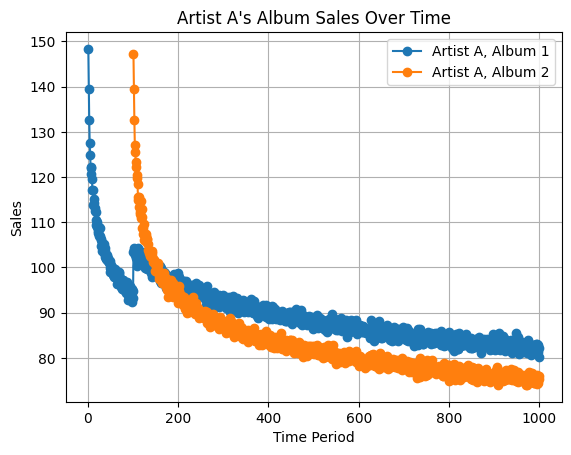

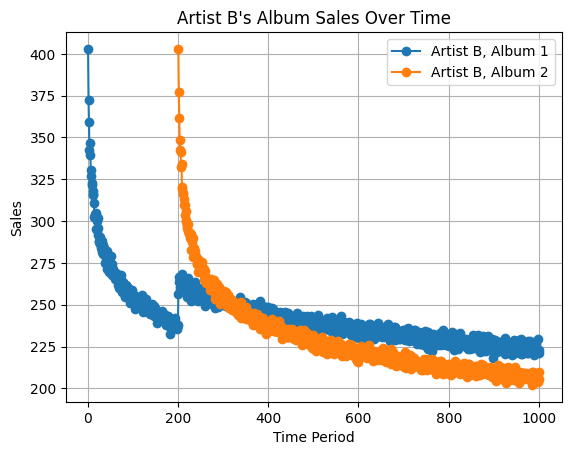

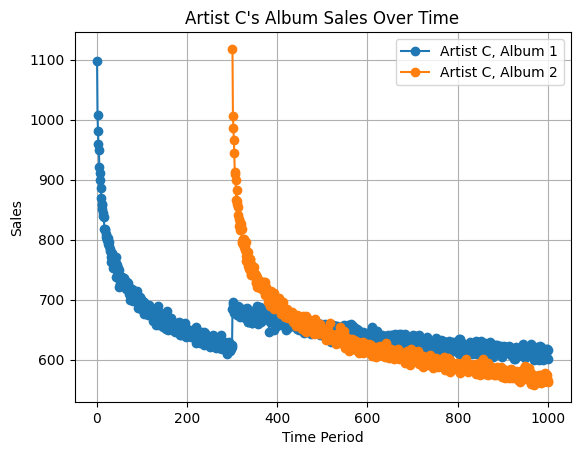

time each artist released their 2nd album:
  artist    t
0      A  101
1      B  201
2      C  301


In [ ]:
import pandas as pd
data = pd.read_csv('/content/DataForPiracyProblemSet.csv')

data['artist'].unique()
#we have three artists
#plot each of their album sales over time individually

artists = data['artist'].unique()

import matplotlib.pyplot as plt

for artist in artists:
    artist_data = data[data['artist'] == artist]
    albums = artist_data['album'].unique()

    for album in albums:
        album_data = artist_data[artist_data['album'] == album]
        plt.plot(album_data['t'], album_data['Sales_'], marker='o', label=f'Artist {artist}, Album {album}')

    plt.title(f"Artist {artist}'s Album Sales Over Time")
    plt.xlabel("Time Period")
    plt.ylabel("Sales")
    plt.legend()
    plt.grid(True)
    plt.show()

#show the exact time each artist released their second album
# Find the time period when each artist released their second album
second_album_release = data[data['album'] == 2].groupby('artist')['t'].min().reset_index()
print ('time each artist released their 2nd album:')
print (second_album_release)

2. For artist A, plot the sales of each album over time (on the same graph)

Please see the graph above

3. Create a variable equal to 1 when the album is the artist’s first album and the next album has
been released: 1(𝑎𝑙𝑏𝑢𝑚 = 1 & 𝑠𝑢𝑏𝑠𝑒𝑞𝑢𝑒𝑛𝑡 𝑎𝑙𝑏𝑢𝑚 𝑟𝑒𝑙𝑒𝑎𝑠𝑒).

In [ ]:
data['subsequent_album'] = 0


for artist in data['artist'].unique():

    second_album_time = data[(data['artist'] == artist) & (data['album'] == 2)]['t'].min()


    for idx, row in data[(data['artist'] == artist) & (data['album'] == 1)].iterrows():
        if row['t'] >= second_album_time:
            data.at[idx, 'subsequent_album'] = 1

#check the result
print (data[data['subsequent_album']==1])
print (data[data['subsequent_album']==0])

         t  album     Sales_ artist  subsequent_album
100    101      1  103.38345      A                 1
102    102      1  103.79571      A                 1
104    103      1  104.36246      A                 1
106    104      1  102.85943      A                 1
108    105      1  103.91486      A                 1
...    ...    ...        ...    ...               ...
5390   996      1  604.99487      C                 1
5392   997      1  617.25543      C                 1
5394   998      1  617.41296      C                 1
5396   999      1  601.41650      C                 1
5398  1000      1  615.35175      C                 1

[2400 rows x 5 columns]
         t  album     Sales_ artist  subsequent_album
0        1      1  148.35422      A                 0
1        2      1  139.48537      A                 0
2        3      1  132.71983      A                 0
3        4      1  127.64436      A                 0
4        5      1  124.88753      A                 0
...

4. Regress 𝑙𝑛(𝑠𝑎𝑙𝑒𝑠) on an indicator variable for whether the subsequent album has been released
ln(𝑆𝑎𝑙𝑒𝑠𝑎𝑟𝑡𝑖𝑠𝑡 ,𝑎𝑙𝑏𝑢𝑚 ,𝑡) = 1(𝑎𝑙𝑏𝑢𝑚 = 1 & 𝑠𝑢𝑏𝑠𝑒𝑞𝑢𝑒𝑛𝑡 𝑎𝑙𝑏𝑢𝑚 𝑟𝑒𝑙𝑒𝑎𝑠𝑒𝑑) + 𝜖𝑎𝑟𝑡𝑖𝑠𝑡 ,𝑎𝑙𝑏𝑢𝑚 ,𝑡

In [ ]:
import numpy as np

data['log_sale'] = np.log(data['Sales_'])

import statsmodels.formula.api as smf
ols = smf.ols('log_sale ~ subsequent_album', data = data).fit()
print (ols.params)


Intercept           5.456257
subsequent_album   -0.068606
dtype: float64


5. Regress 𝑙𝑛(𝑠𝑎𝑙𝑒𝑠) on an indicator variable for whether the subsequent album has been released
and include artist fixed effects.
ln (𝑆𝑎𝑙𝑒𝑠𝑎𝑟𝑡𝑖𝑠𝑡 , 𝑎𝑙𝑏𝑢𝑚 , 𝑡) = 1(𝑎𝑙𝑏𝑢𝑚 = 1 & 𝑠𝑢𝑏𝑠𝑒𝑞𝑢𝑒𝑛𝑡 𝑎𝑙𝑏𝑢𝑚 𝑟𝑒𝑙𝑒𝑎𝑠𝑒𝑑) + 𝜙𝑎𝑟𝑡𝑖𝑠𝑡+ 𝜖𝑎𝑟𝑡𝑖𝑠𝑡 ,𝑎𝑙𝑏𝑢𝑚 ,𝑡

In [ ]:
ols = smf.ols('log_sale ~ subsequent_album + C(artist)',data=data).fit()
print (ols.params)

Intercept           4.453631
C(artist)[T.B]      1.002642
C(artist)[T.C]      2.005235
subsequent_album    0.014946
dtype: float64


6.Regress log sales on both artist and album age fixed effects and an indicator variable for
whether the subsequent album has been released
ln(𝑆𝑎𝑙𝑒𝑠𝑎𝑟𝑡𝑖𝑠𝑡 , 𝑎𝑙𝑏𝑢𝑚 , 𝑡) = 1(𝑎𝑙𝑏𝑢𝑚 = 1 & 𝑠𝑢𝑏𝑠𝑒𝑞𝑢𝑒𝑛𝑡 𝑎𝑙𝑏𝑢𝑚 𝑟𝑒𝑙𝑒𝑎𝑠𝑒𝑑) + 𝛾𝑡 + 𝜖𝑎𝑟𝑡𝑖𝑠𝑡 ,𝑎𝑙𝑏𝑢𝑚 ,𝑡

In [ ]:
#compute the time the album was released
#make a variable in the middle called release_time
release_time = data.groupby(['artist', 'album'])['t'].min().reset_index()
#make a temporary database:
release_time.columns = ['artist','album','release_time']

#the result:
print (release_time)


  artist  album  release_time
0      A      1             1
1      A      2           101
2      B      1             1
3      B      2           201
4      C      1             1
5      C      2           301


In [ ]:
#now we can merge the table above with the database
data = pd.merge(data, release_time, on=['artist', 'album'])

data.head()

,t,album,Sales_,artist,subsequent_album,log_sale,release_time
0,1,1,148.35422,A,0,4.999603,1
1,2,1,139.48537,A,0,4.937960,1
2,3,1,132.71983,A,0,4.888240,1
3,4,1,127.64436,A,0,4.849248,1
4,5,1,124.88753,A,0,4.827414,1


In [ ]:
#now we can compute the album age:
data['album_age'] = data['t'] - data['release_time']

data.head()

,t,album,Sales_,artist,subsequent_album,log_sale,release_time,album_age
0,1,1,148.35422,A,0,4.999603,1,0
1,2,1,139.48537,A,0,4.937960,1,1
2,3,1,132.71983,A,0,4.888240,1,2
3,4,1,127.64436,A,0,4.849248,1,3
4,5,1,124.88753,A,0,4.827414,1,4


In [ ]:
#the ols is too complicated for the python package to handle
#i will export the manipulated database to csv and finish the remaining part with R
data.to_csv('Album_data.csv',index=False)

R program:

library(readr)


library(dplyr)

data <- read.csv('Album_data.csv')


model <- lm(log_sale ~ subsequent_album + factor(artist) + factor(album_age), data=data)


summary(model)


Estimated Coefficient for subsequent_album is 0.0998873. The R file is included in the assignment submission

7. Comment on your findings. What did you find? What did you learn? Why did some
specifications show the effect while others did not?

By simply regressing log sales on subsequent_album, there is a negative coefficient, which means that the simple regression estimates having a subsequent album hurts the sales number.

The image starts changing after we includes fixed effect. We witnessed increasing coefficient of subsequent_album indicator after including fixed effect. Having a subsequent album actually boost the sales number. Including artist fixed effects revealed significant baseline differences in sales between artists, indicating inherent popularity of the artist themselves. Including album-age fixed effects demonstrated that the age of an album is crucial to understanding sales dynamics.